In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

import dyn
import obs

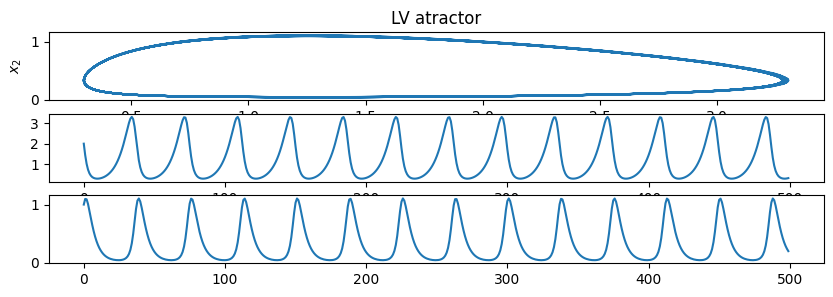

In [2]:
Mdl=dyn.LV(dtcy=0.5) # instancio la clase
x = np.zeros((500,2))
#_,x[0] = Mdl.initialization()  # determino una condicion inicial
x[0]=np.array((2,1))
for it  in range(1,x.shape[0]):
    x[it]=Mdl(x[it-1]) # integro a partir de la condicion inicial el modelo
# Graficacion
xg=x.T # time series
fig,ax = plt.subplots(3,1,figsize=(10, 3))
ax[0].plot(xg[0],xg[1])
ax[0].set_title('LV atractor')
ax[0].set(xlabel=r'$x_1$',ylabel=r'$x_2$');
ax[1].plot(xg[0])
ax[2].plot(xg[1])

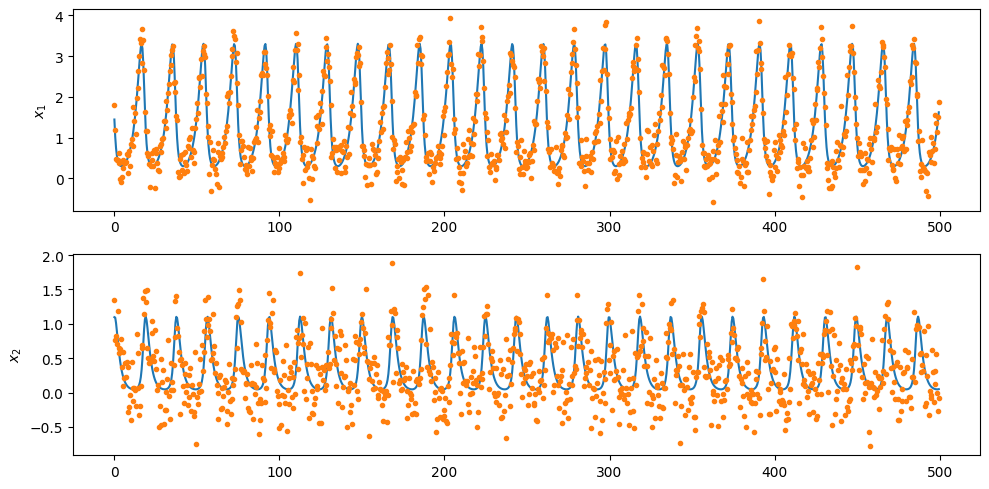

In [6]:
Obs=obs.OBS(H=np.eye(2),R=0.1* np.eye(2))
xt0 = np.array((2,1))
xt_t, y_t = Obs(xt0,1000,Mdl)
xtg_t=xt_t.T; yg_t=y_t.T
time=Mdl.dtcy * np.arange(xt_t.shape[0])

fig,ax = plt.subplots(2,1,figsize=(10, 5))
ax[0].plot(time,xtg_t[0])
ax[0].plot(time,yg_t[0],'.')
ax[0].set(ylabel=r'$x_1$')
ax[1].plot(time,xtg_t[1])
ax[1].plot(time,yg_t[1],'.')
ax[1].set(ylabel=r'$x_2$')
fig.tight_layout()
